## Fashion MNIST : CNN 과 Callback 구현

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.17.0'

In [7]:
# loading Fashion MNIST data
# 설명 :  https://www.tensorflow.org/tutorials/keras/classification
# 소스 :  https://github.com/tensorflow/docs-l10n/tree/master/site/ko/tutorials/keras

fashion_mnist = tf.keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)
(28, 28)
[9 0 0 3 0 2 7 2 5 5 0 9 5 5 7 9 1 0 6 4 3 1 4 8 4 3 0 2 4 4]


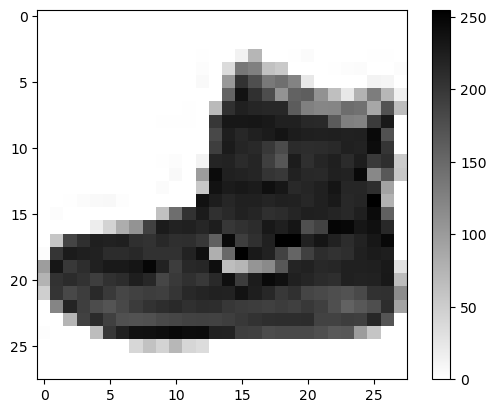

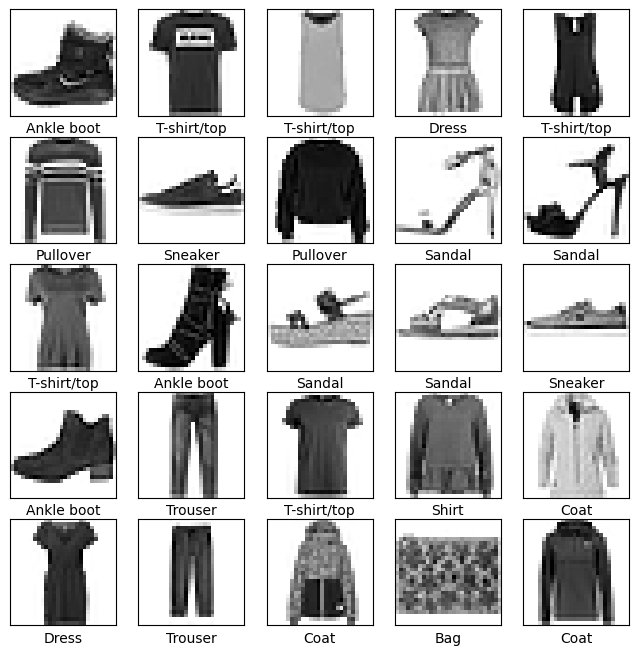

In [8]:
# 이미지 데이터 정보 및 시각화
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(x_train.shape,y_train.shape)  # (60000, 28, 28) (60000,)
print(x_test.shape,y_test.shape)    # (10000, 28, 28) (10000,)
print(x_train[0].shape)             # (28, 28)
# print(x_train[0])
print(y_train[:30])

plt.imshow(x_train[0],cmap=plt.cm.binary)
# plt.imshow(x_train[0],cmap='gray')
plt.colorbar()

plt.figure(figsize=(8,8))         # 그래프 사이즈의 크기 설정, width,height, default:[6.4,4.8]
for k in range(25):
    plt.subplot(5,5,k+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[k],cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[k]])

plt.show()

In [21]:
a = np.array([-100,10,100,300,1000,5000])
b = (a - np.min(a))/(np.max(a) - np.min(a))  # 정규화(Normalization) , MinMax Scaler
# 정규화 공식 : (X -최소값)/(최대값 - 최소값)
# 최소값이 0인 경우 : X / 최대값
# 출력 값은 0과 1사이
print(a)
print(b)

[-100   10  100  300 1000 5000]
[0.         0.02156863 0.03921569 0.07843137 0.21568627 1.        ]


In [24]:
# 이미지 정규화(Normalization) : 0 to 255 ==> 0 to 1
x_train = x_train / 255.
x_test = x_test / 255.

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

In [29]:
# 정규화 함수 직접 구현할 경우(여기서는 불필요)
# Z = (X-min())/(max()-min())
def normalizer(data):
    result = (data - np.min(data,axis=0))/(np.max(data,axis=0) - np.min(data,axis=0))
    return result

# print(np.min(x_train,axis=0))   # 0  ...
# print(np.max(x_train,axis=0))   # 255 ...
# x_train = normalizer(x_train)
# x_test = nomalizer(x_test)

In [30]:
# CNN 을 사용하지 않은 모델
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# 학습 및 평가
model.fit(x_train, y_train, epochs=10)
model.evaluate(x_test, y_test)  # 0.8741000294685364

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7789 - loss: 0.6295
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8627 - loss: 0.3863
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8738 - loss: 0.3453
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8828 - loss: 0.3158
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8913 - loss: 0.2932
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8984 - loss: 0.2750
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9003 - loss: 0.2673
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9040 - loss: 0.2568
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9075 - loss: 0.2477
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9113 - loss: 0.2361
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8722 - loss: 0.3523


[0.34779495000839233, 0.8741000294685364]

In [33]:
# CNN 사용 모델
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28,1)),    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# 학습  
history = model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8095 - loss: 0.5362
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.8982 - loss: 0.2811
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9182 - loss: 0.2256
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9295 - loss: 0.1936
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 13ms/step - accuracy: 0.9382 - loss: 0.1661


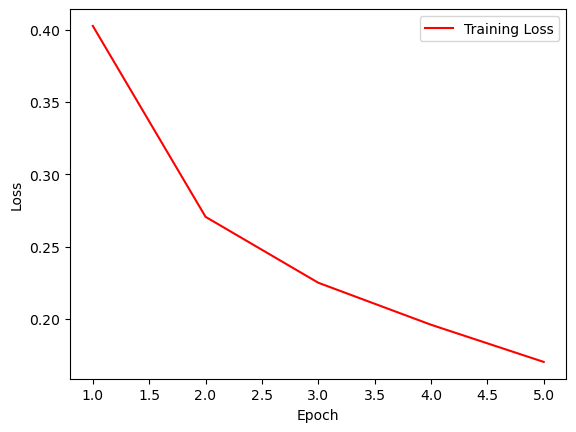

In [35]:
# 시각화
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [36]:
# 평가
model.evaluate(x_test, y_test)  # 0.9103999733924866

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9114 - loss: 0.2571


[0.2547757923603058, 0.9103999733924866]

In [37]:
# 예측
preds = model.predict(x_test)
print(preds[0])
print(y_test[0])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
[6.45479020e-07 3.19654969e-09 3.36508992e-06 1.15497784e-07
 4.79803361e-08 3.64534094e-06 1.19347572e-08 8.93118035e-04
 1.02227182e-06 9.99097943e-01]
9


### Callback  사용 학습 모델  구현 : Fashion MNIST

In [57]:

class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        # print('>>>on_epoch_end,acc:',logs.get('accuracy'),'loss:',logs.get('loss'))
        if(logs.get('accuracy')>0.90):
            print("\nReached 90% accuracy so cancelling training!")
            self.model.stop_training = True
        
callbacks = myCallback()   # callback 인스턴스(객체) 생성

# CNN 사용 모델
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28,1)),    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_9 (Flatten)                  │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
# 학습  
model.fit(x_train, y_train, epochs=5,callbacks=callbacks)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 25s 12ms/step - accuracy: 0.8178 - loss: 0.5196
Epoch 2/5
1874/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9023 - loss: 0.2695
Reached 90% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9023 - loss: 0.2695


In [59]:
# 평가
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8934 - loss: 0.2928


[0.2906120717525482, 0.8899000287055969]

In [60]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):       
        if(logs.get('loss') < 0.23):
            print("\nReached 0.23 loss so cancelling training!")
            self.model.stop_training = True
            
callbacks = myCallback()   # callback 인스턴스(객체) 생성    

# CNN 사용 모델
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(28, 28,1)),    
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_10 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 128)                 │         692,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

In [61]:
# 학습  
model.fit(x_train, y_train, epochs=5,callbacks=callbacks)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 24s 12ms/step - accuracy: 0.8109 - loss: 0.5374
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.8994 - loss: 0.2812
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9149 - loss: 0.2321
Epoch 4/5
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9272 - loss: 0.1979
Reached 0.23 loss so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 22s 12ms/step - accuracy: 0.9272 - loss: 0.1979
